<center><font size = "10"> Week 3 - Morphologies <center>
<center><font size = "8">Homework ANSWERS<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number:
<br>Group member1:
<br>Group member2:
<br>Group member3:
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

In [1]:
%matplotlib inline 

import numpy as np
import neurom as nm
import matplotlib.pyplot as plt

from neuron import h
from hoc2swc import neuron2swc
from neurom import view
from neurom.view.matplotlib_utils import update_plot_limits

--No graphics will be displayed.


# <font color='red'> Ex1: </font>Create your favorite neuron
    
<font size ="3">Write code that builds a geometrical model of a neuron with one soma, one axon and two dendrites. Add three branches to the first dendrite. Set different geometrical properties to your morphology (diameter, lenght). Show the resulting model.  

<font color= 'red'>[0.5 pts]

In [2]:
soma = h.Section(name="soma")

# Define all the sections first
dend1 = h.Section(name="dend1")
dend2 = h.Section(name="dend2")
axon = h.Section(name="axon")
first_branch = h.Section(name="first_branch")
second_branch = h.Section(name="second_branch")
third_branch = h.Section(name="third_branch")

# Geometry
soma.L = soma.diam = 15
dend1.L = 100
dend1.diam = 5

dend2.L = 100
dend2.diam = 6
axon.L = 200
axon.diam = 7

first_branch.L = 50
first_branch.diam = 3
second_branch.L = 50
second_branch.diam = 3
third_branch.L = 50
third_branch.diam = 3

# Topology: conenct branches to the soma
dend1.connect(soma(1))
dend2.connect(soma(1))
axon.connect(soma(0))

first_branch.connect(dend1(1))
second_branch.connect(dend1(1))
third_branch.connect(dend1(1))
h.topology()  # Check the topology


|-|       soma(0-1)
   `|       dend1(0-1)
     `|       first_branch(0-1)
     `|       second_branch(0-1)
     `|       third_branch(0-1)
   `|       dend2(0-1)
 `|       axon(0-1)



1.0

Wrote cell 0 to output/favourite_neuron.swc


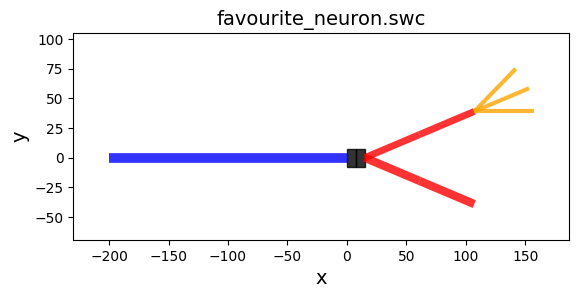

In [3]:
neuron2swc("output/favourite_neuron.swc", swap_yz=False)
neuron2 = nm.load_morphology("output/favourite_neuron.swc")
view.plot_morph(neuron2)

# <font color= 'red'>Ex2:</font> Visualizing neurons


Get familiar with your assigned morphology
    
    
<font size ="3"> Generate three plots:
  - Visualize each of your group's cells with neurom
  - Pick a cell and create a dendrogram of it
  - Pick a cell, isolate each of its neurites, and view them individually
    
Make sure to include a title for each plot, and for 1 and 2 plot everything within the same figure (hint: use `plt.subplots`). The plots should be clear - not cluttered <font color= 'red'>[1.5 pts]

~ Hint: if you run into problems, check out neurom.view.matplotlib_utils

In [6]:
morph_dir = 'input/your_group_morphologies/group_07'
neurons = nm.load_morphologies(morph_dir)


/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_7.swc:0:warning
Three Point Soma: Only one column has the same coordinates.

/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_4.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.

/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_1.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.

/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_8.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.


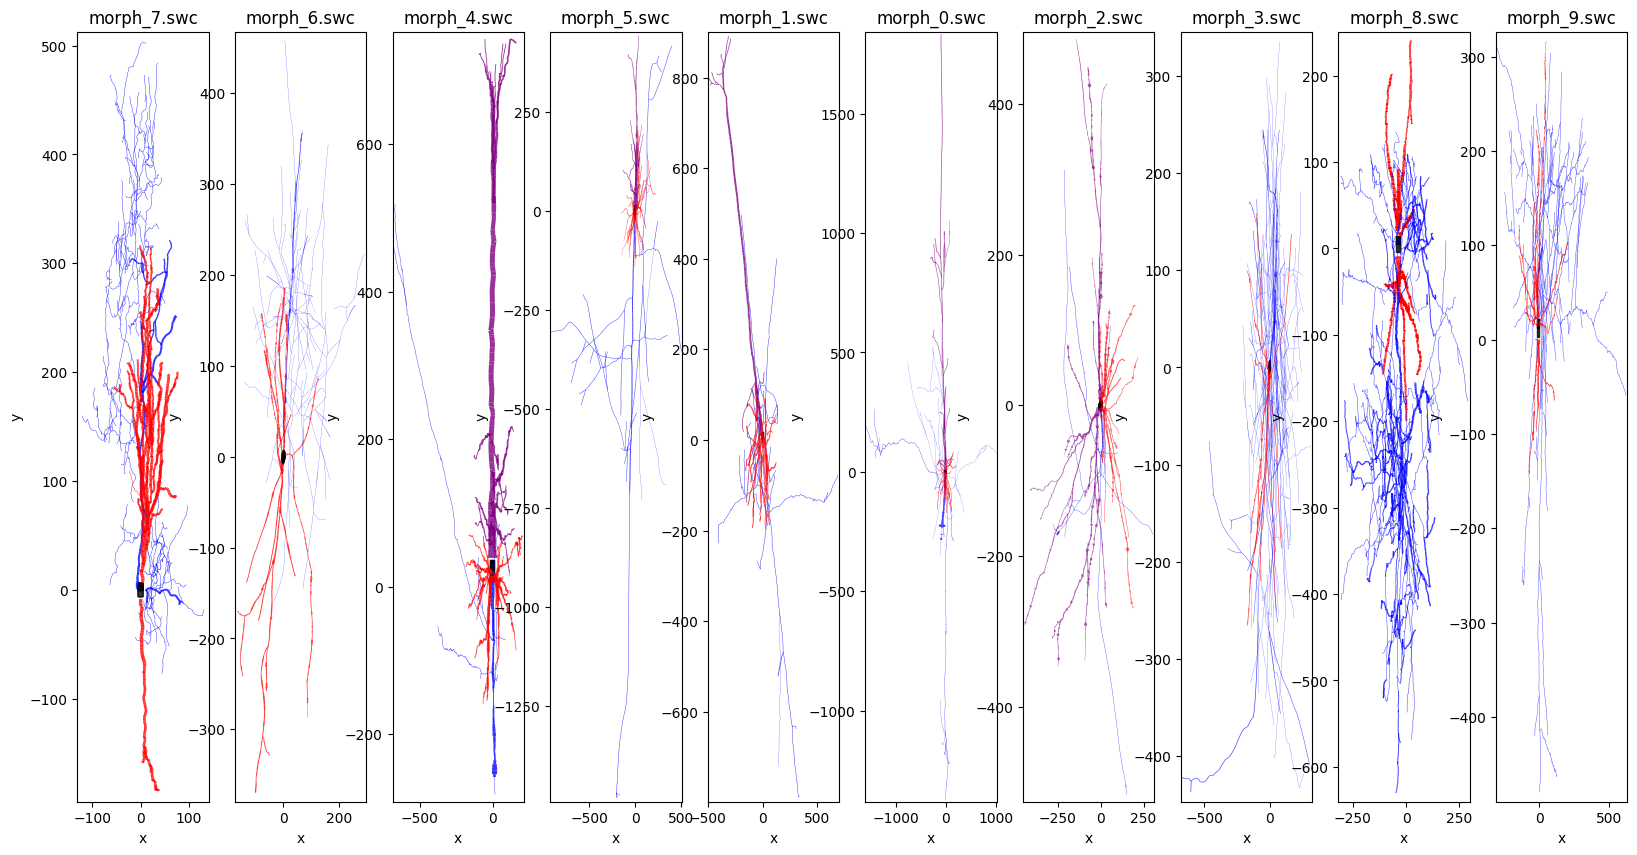

In [7]:
# Ceate the plot of full morphology
f, axes = plt.subplots(1, len(neurons), figsize=(20, 10))
for axis, neuron in zip(axes, neurons):
    view.plot_morph(neuron, ax=axis)
    view.matplotlib_utils.update_plot_limits(axis, 10)

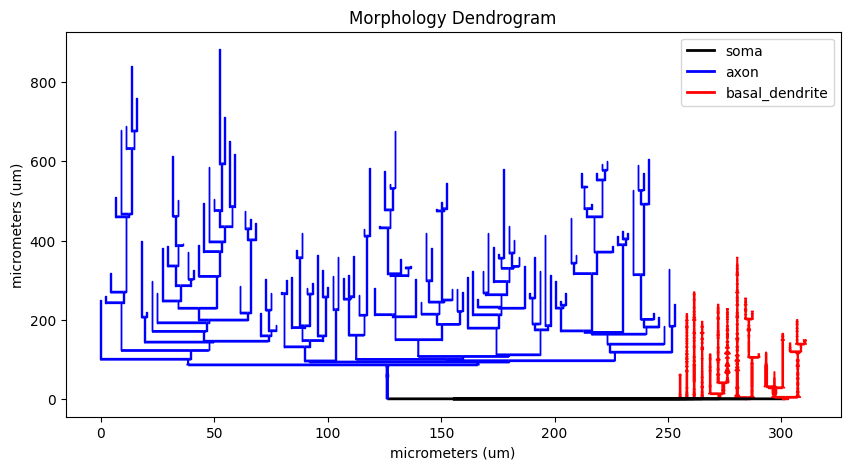

In [8]:
# Plot the dendrogram of the chosen neuron 
fig, ax = plt.subplots(figsize=(10, 5))
view.plot_dendrogram(neuron, ax=ax)

AttributeError: module 'neurom.view' has no attribute 'plot_tree'

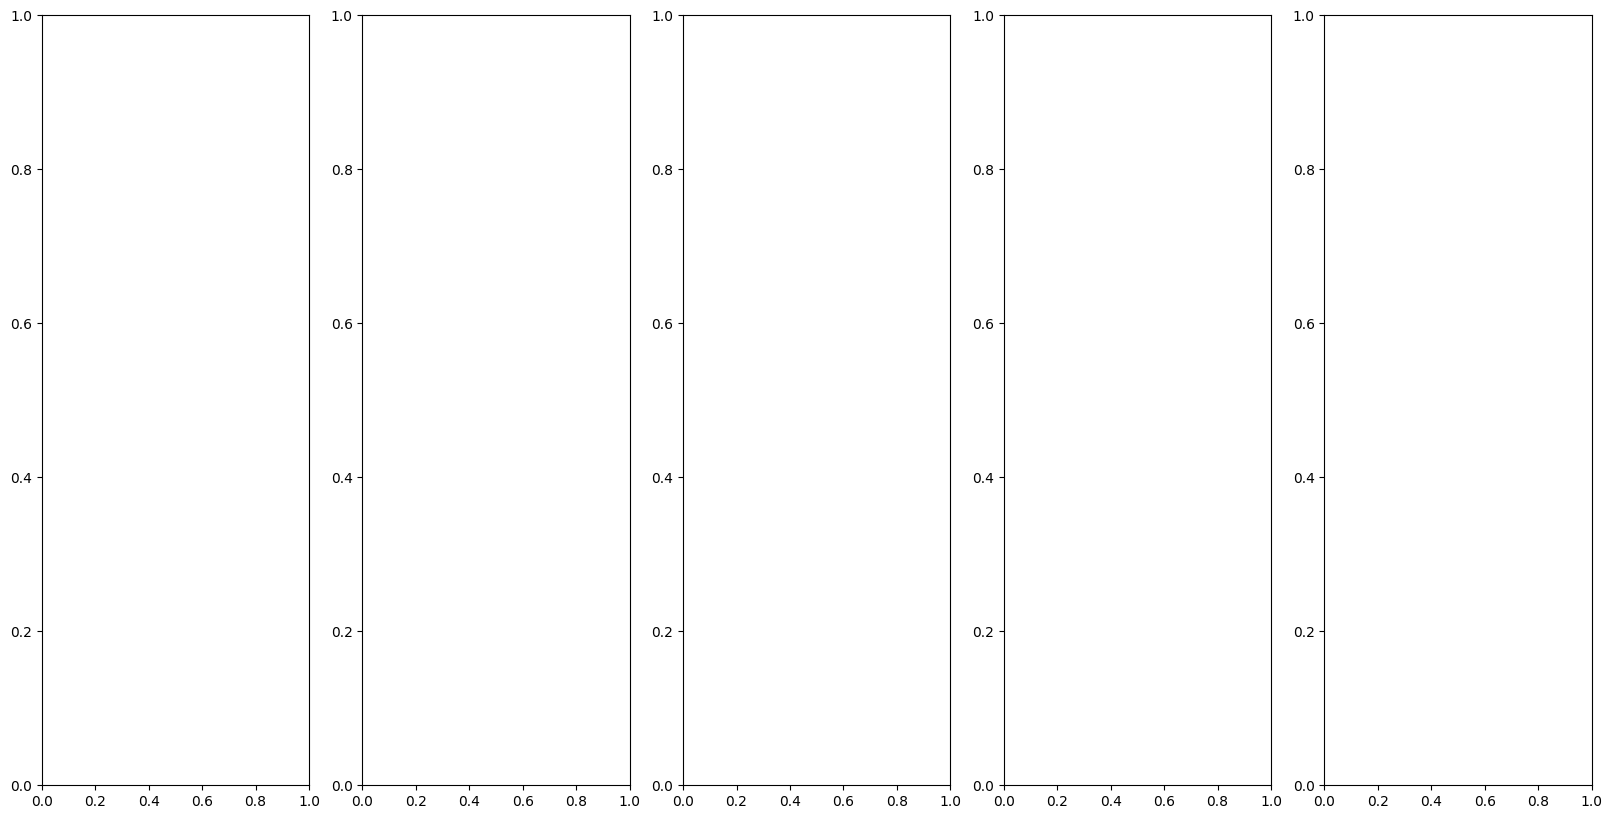

In [9]:
neuron = neurons[1]
neurites = neuron.neurites
# Plot each of the neurites separately
N = len(neurites)

# create N subplots, one for each neurite
fig, ax = plt.subplots(1, N, figsize=(20, 10))  # figsize in inches (width, height)

for n, (neurite, current_axes) in enumerate(zip(neurites, ax.flatten())):
    view.plot_tree(neurite, ax=current_axes, plane="xy")
    update_plot_limits(current_axes, white_space=10)

    current_axes.set_xlabel("x (um)")
    current_axes.set_ylabel("y (um)")

    # remove the title for each subplot
    current_axes.set_title(f"neurite {n}")
    plt.tight_layout()

### **Grading**: 
<font color= 'red'>[0.5 pt]</font> for each of the 3 plots (all cells in group, dendrogram and individual neurites from one chosen cell)

# <font color= 'red'>Ex3:</font> Check your set of morphologies for mistakes

Now check your morphologies for mistakes. After the code has given you results, add you own reasoning and undertanding: in some cases, what looks like a mistake may not be one at all!

Read the attached papers describing neuronal characteristics to help you understand if a cell is supposed or not to have/lack certain features. 

Explain in your own words what each of the errors means and group the morphologies into correct and incorrect ones.
Describe how you may approach correcting the incorrect ones 

<font color= 'red'>[1.5 pts]</font>

_Hint:_ as we have seen in the lecture, neurons have very different shapes. Some of them may even miss some parts that other neurons have, but this doesn't mean that their reconstruction is wrong.
<br>_Resources:_ you can read the [Petilla group paper (2008)](https://www.nature.com/articles/nrn2402.pdf) for interneurons and the structure section of [this Scholarpedia page](http://www.scholarpedia.org/article/Pyramidal_neuron#Structure) for pyramidal neurons.

In [10]:
from neurom.check.runner import CheckRunner

In [11]:
# FROM TUTORIAL 2
config = {
    "checks": {
        "morphology_checks": [
            "has_axon",
            "has_basal_dendrite",
            "has_apical_dendrite",
            "has_no_jumps",
            "has_no_fat_ends",
            "has_nonzero_soma_radius",
            "has_all_nonzero_neurite_radii",
            "has_all_nonzero_section_lengths",
            "has_all_nonzero_segment_lengths",
            "has_no_flat_neurites",
            "has_nonzero_soma_radius",
            "has_no_narrow_start",
            "has_no_dangling_branch",
        ]
    },
    "options": {
        "has_nonzero_soma_radius": 0.0,
        "has_all_nonzero_neurite_radii": 0.007,
        "has_all_nonzero_segment_lengths": 0.01,
        "has_all_nonzero_section_lengths": 0.01,
    },
}

In [12]:
# create a CheckRunner object by providing the configuration dict
check_runner = CheckRunner(config)

# run on a directory or a morphology
results = check_runner.run(morph_dir)
results


input/your_group_morphologies/group_07/morph_7.swc:0:warning
Three Point Soma: Only one column has the same coordinates.
                Has apical dendrite FAIL
                       Has no jumps FAIL
                                ALL FAIL
                Has apical dendrite FAIL
                                ALL FAIL

input/your_group_morphologies/group_07/morph_4.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.
                       Has no jumps FAIL
                    Has no fat ends FAIL
             Has no dangling branch FAIL
                                ALL FAIL

input/your_group_morphologies/group_07/morph_1.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.
                       Has no jumps FAIL
                                ALL FAIL
                Has apical dendrite FAIL
                                ALL FAIL

input/your_group_mor

{'files': {'input/your_group_morphologies/group_07/morph_7.swc': OrderedDict([('Has axon',
                True),
               ('Has basal dendrite', True),
               ('Has apical dendrite', False),
               ('Has no jumps', False),
               ('Has no fat ends', True),
               ('Has nonzero soma radius', True),
               ('Has all nonzero neurite radii', True),
               ('Has all nonzero section lengths', True),
               ('Has all nonzero segment lengths', True),
               ('Has no flat neurites', True),
               ('Has no narrow start', True),
               ('Has no dangling branch', True),
               ('ALL', False)]),
  'input/your_group_morphologies/group_07/morph_6.swc': OrderedDict([('Has axon',
                True),
               ('Has basal dendrite', True),
               ('Has apical dendrite', False),
               ('Has no jumps', True),
               ('Has no fat ends', True),
               ('Has nonzero soma rad

In [13]:
for file, data in results['files'].items():
    print("File: ", file)
    for k, v in data.items():
        if not v:
            print(k, "Failed")

File:  input/your_group_morphologies/group_07/morph_7.swc
Has apical dendrite Failed
Has no jumps Failed
ALL Failed
File:  input/your_group_morphologies/group_07/morph_6.swc
Has apical dendrite Failed
ALL Failed
File:  input/your_group_morphologies/group_07/morph_4.swc
Has no jumps Failed
Has no fat ends Failed
Has no dangling branch Failed
ALL Failed
File:  input/your_group_morphologies/group_07/morph_5.swc
File:  input/your_group_morphologies/group_07/morph_1.swc
Has no jumps Failed
ALL Failed
File:  input/your_group_morphologies/group_07/morph_0.swc
File:  input/your_group_morphologies/group_07/morph_2.swc
File:  input/your_group_morphologies/group_07/morph_3.swc
Has apical dendrite Failed
ALL Failed
File:  input/your_group_morphologies/group_07/morph_8.swc
Has apical dendrite Failed
Has no jumps Failed
ALL Failed
File:  input/your_group_morphologies/group_07/morph_9.swc
Has apical dendrite Failed
Has no jumps Failed
Has no dangling branch Failed
ALL Failed


## Expected answer:
List of correct morphologies and morphologies with errors with explanation of the errors:

The list of good morphologies:
- C040896A-P3.asc 
- vd110617_idA.asc
- vd110611_idA.asc 


List of the morphologies with mistakes and explanation of the approach to solve the mistakes: (for example)
- rp080520-1C_P9.asc : has jumps, fat ends, sections and segments of zero lenghts as well as dangling branches and root-node jumps

Based on the attached papers: students should realize that the involved interneurons may have different morphological structure. 

#### Possible corrections:
_Jumps_:
- may be corrected through interpolation (prediction based on adjacent slices)
- using  a surface mesh cell model (Kanari et al)
- correction by hand based on morphological type 

_Lack of apical dendrite_:
- predict missing dendrite based on other reconstructions of similar morphological type 

_Fat ends_:
- use other ends of similar neurons to correct the errors
- predict endings from other morphologies of the same morphological type

General comment: Errors can originate from incorrect automatic tracing or errors based introduced by the person analyzing the data.

### **Grading**: 
-  <font color= 'red'>[0.5 pt]</font> for testing the morphologies and listing good/bad
-  <font color= 'red'>[1 pt]</font> for explanation (0.5 for error explanations and 0.5 for possible solutions)

# <font color= 'red'>Ex4:</font> Morphometrics

<font size = "3"> Now that you know (from code + papers) which cells in your set are morphologically correct it's time to analyze some of their characteristics. 

- Compute some morphometric characteristics of ALL the cells in your cell set that you have judged to be correct sensible cells. 
- Find the morphometric characteristics that best enable you to classify the cells into different groups (the list of morphometric features available out of the box can be found in neurom.features.morphology)
- For three metrics, use bar plots to compare them between the cells. Explain any differences you see.
- Discuss: would combining multiple morphometrics help to distinguish them better?
    
 <font color= 'red'> Again, make use of the provided papers [2.5 pts]

In [14]:
labels = range(len(neurons))

In [15]:
# Histograms
def histogram(data, title, ylabel):
    """Generates a histogram in a new figure"""

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.bar(x, data, width)

    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    return fig, ax

In [16]:
basallenght = np.array([])
for neur in neurons:
    temp = nm.get("section_lengths", neur, neurite_type=nm.NeuriteType.basal_dendrite)
    basallenght = np.append(basallenght, np.sum(temp))


/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_7.swc:0:warning
Three Point Soma: Only one column has the same coordinates.

/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_4.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.

/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_1.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.

/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_8.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.


In [17]:
neurite_volume = np.array([])
for neur in neurons:
    temp = nm.get(
        "neurite_volume_density", neur, neurite_type=nm.NeuriteType.basal_dendrite
    )
    neurite_volume = np.append(neurite_volume, np.sum(temp))


/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_7.swc:0:warning
Three Point Soma: Only one column has the same coordinates.

/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_4.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.

/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_1.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.

/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_8.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.


In [18]:
somavolumes = np.array([])
for neur in neurons:
    temp = nm.get("soma_volume", neur)
    somavolumes = np.append(somavolumes, np.sum(temp))


/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_7.swc:0:warning
Three Point Soma: Only one column has the same coordinates.

/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_4.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.

/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_1.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.

/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_8.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.


In [19]:
axonallenght = np.array([])
for neur in neurons:
    temp = nm.get("section_lengths", neur, neurite_type=nm.NeuriteType.axon)
    axonallenght = np.append(axonallenght, np.sum(temp))


/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_7.swc:0:warning
Three Point Soma: Only one column has the same coordinates.

/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_4.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.

/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_1.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.

/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 2/input/your_group_morphologies/group_07/morph_8.swc:0:warning
Three Point Soma: The non-constant columns is not offset by +/- the radius from the initial sample.


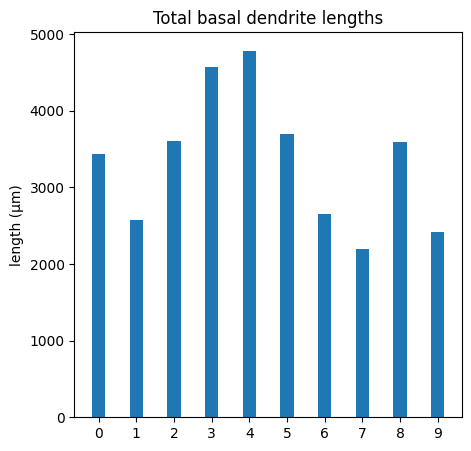

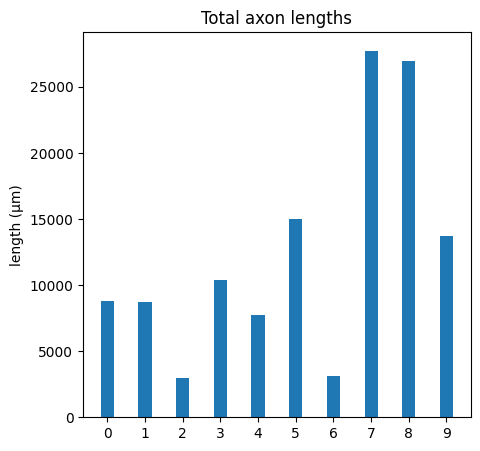

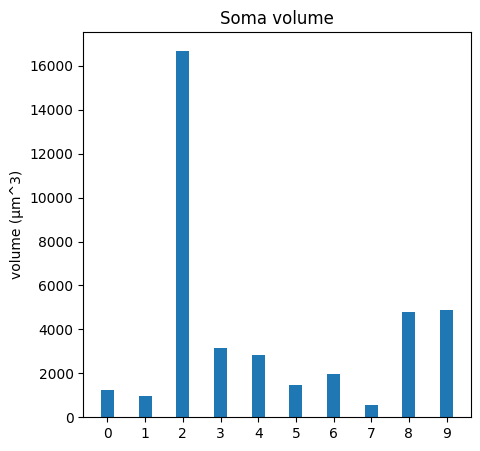

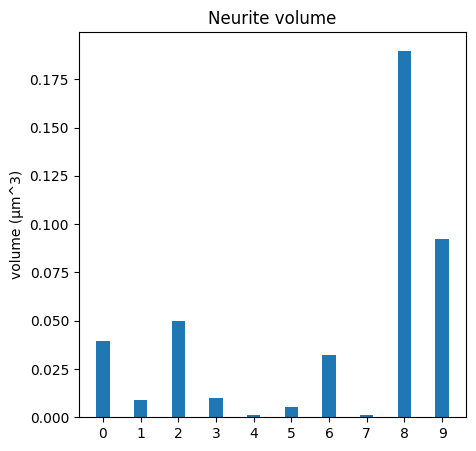

In [20]:
histogram(basallenght, "Total basal dendrite lengths", "length (µm)")
histogram(axonallenght, "Total axon lengths", "length (µm)")
histogram(somavolumes, "Soma volume", "volume (µm^3)")
histogram(neurite_volume, "Neurite volume", "volume (µm^3)");

### **Grading**: 
- <font color= 'red'>[1 pt]</font> for measurement and visualization
- <font color= 'red'>[0.5 pt]</font> for correct classification of neurons
- <font color= 'red'>[1 pt]</font> for explanation of which morphometrics were most helpful for the decision: what does the histogram indicate, how did you classify the neurons?